<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/281a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt
from PIL import Image
import os
import imageio
import copy

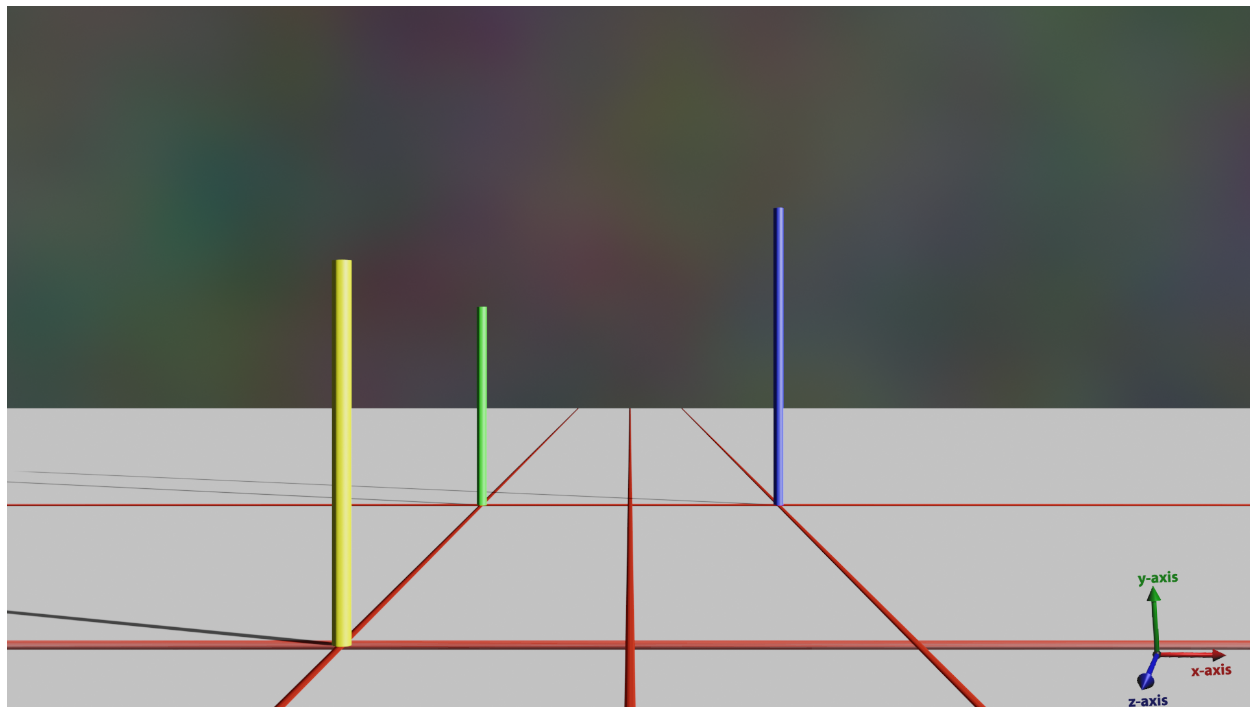

You are given the following information about the 3-D scene. 
<li>
There are three poles colored yellow, green, and blue, and a ground plane in this scene. 
</li>
<li>The three poles are perpendicular to the ground plane. </li> 
<li>The ground plane is parallel to the X-Z plane. </li>
<li> The camera's optical axis is parallel to the Z-axis. </li>
<li> Standing at 4 meters, the yellow and green poles are of the same height in the 3-D scene. </li>
<li>The distance between these two poles(green and yellow) is 17 meters. </li>
<li> The green and blue poles are at the same, but unknown, distance from the camera. </li>
<li> Finally, the resolution of the image sensor of the camera is 53,333 pixels per meter. </li>

Recall the perspective projection equation that tells us the relationship between a point's location in the 3-D world (X,Y,Z), the camera focal length (f), and the projection of that point in the image (x,y):
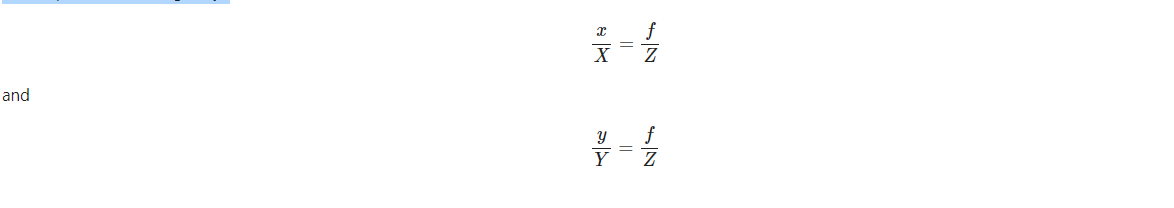

**Question**
Write a python script to measure the heights and distances between the poles in image coordinates. From these image measurements and the 3-D quantities specified above, you will be able to determine the camera focal length and 3-D height of the blue pole.

**Pixel Locations**
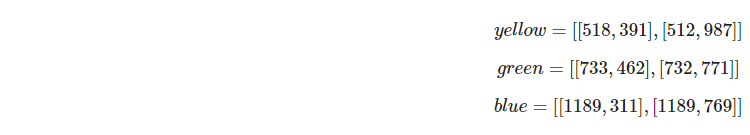

**Deliverables:**
Using the above perspective projection equations, compute and report:

<li>Camera focal length f (in mm)</li>
<li>3-D height (Y) of blue pole (in m)</li>

In [12]:
Z_y, Z_g, Z_b = 4, 21, 21
f = 1

# Yellow pole, world coordinate system
x_y_x1, x_y_x2 = 518, 512
y_y_y1, y_y_y2 = 391, 987

# Green pole, world coordinate system
x_g_x1, x_g_x2 = 733, 732
y_g_y1, y_g_y2 = 462, 771

# Blue pole, world coordinate system
x_b_x1, x_b_x2 = 1189, 1189
y_b_y1, y_b_y2 = 311, 769


In [13]:
yellow_pole_sensor_height = np.sqrt((x_y_x1 - x_y_x2) ** 2 + (y_y_y1 - y_y_y2) ** 2)
green_pole_sensor_height = np.sqrt((x_b_x1 - x_b_x2) ** 2 + (y_b_y1 - y_b_y2) ** 2)
blue_pole_sensor_height = np.sqrt((x_g_x1 - x_g_x2) ** 2 + (y_g_y1 - y_g_y2) ** 2)

In [14]:
yellow_pole_sensor_height, green_pole_sensor_height, blue_pole_sensor_height

(596.0302005771184, 458.0, 309.0016181187406)

In [10]:
# Yellow pole, sensor coordinate system
x_y_x1 = (f * X_y_x1) / Z_y
x_y_x2 = (f * X_y_x2) / Z_y

x_y_y1 = (f * Y_y_y1) / Z_y
x_y_y2 = (f * Y_y_y2) / Z_y

# Green pole, sensor coordinate system
x_g_x1 = (f * X_g_x1) / Z_g
x_g_x2 = (f * X_g_x2) / Z_g

x_g_y1 = (f * Y_g_y1) / Z_g
x_g_y2 = (f * Y_g_y2) / Z_g

# Blue pole, sensor coordinate system
x_b_x1 = (f * X_b_x1) / Z_b
x_b_x2 = (f * X_b_x2) / Z_b

x_b_y1 = (f * Y_b_y1) / Z_b
x_b_y2 = (f * Y_b_y2) / Z_b


In [11]:
x_s_yellow_pole_projection = np.sqrt((X_y_x1 - X_y_x2) ** 2 + (x_y_y1 - x_y_y2) ** 2)
x_s_green_pole_projection = np.sqrt((X_g_x1 - X_g_x2) ** 2 + (x_g_y1 - x_g_y2) ** 2)
x_s_blue_pole_projection = np.sqrt((X_b_x1 - X_b_x2) ** 2 + (x_b_y1 - x_b_y2) ** 2)
